In [1]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
#data
dataset = pd.read_csv("trainingData.csv")

print(dataset.shape)

(19937, 529)


In [3]:
# types
set_option('display.max_rows', 25) 
print(dataset.dtypes)

WAP001                int64
WAP002                int64
WAP003                int64
WAP004                int64
WAP005                int64
WAP006                int64
WAP007                int64
WAP008                int64
WAP009                int64
WAP010                int64
WAP011                int64
WAP012                int64
                     ...   
WAP518                int64
WAP519                int64
WAP520                int64
LONGITUDE           float64
LATITUDE            float64
FLOOR                 int64
BUILDINGID            int64
SPACEID               int64
RELATIVEPOSITION      int64
USERID                int64
PHONEID               int64
TIMESTAMP             int64
Length: 529, dtype: object


In [4]:
# head
set_option('display.width', 100) 
print(dataset.head(20))

    WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  WAP010     ...      \
0      100     100     100     100     100     100     100     100     100     100     ...       
1      100     100     100     100     100     100     100     100     100     100     ...       
2      100     100     100     100     100     100     100     -97     100     100     ...       
3      100     100     100     100     100     100     100     100     100     100     ...       
4      100     100     100     100     100     100     100     100     100     100     ...       
5      100     100     100     100     100     100     100     100     100     100     ...       
6      100     100     100     100     100     100     100     100     100     100     ...       
7      100     100     100     100     100     100     100     100     100     100     ...       
8      100     100     100     100     100     100     100     100     100     100     ...       
9      100     100  

In [5]:
# Response variables in our problem are Building, Floor, Latitude, Longitude and Relative Position
(dataset[['FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','USERID','PHONEID']]
.astype(str)
.describe(include=['object']))

,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID
count,19937,19937,19937,19937,19937,19937
unique,5,3,123,2,18,16
top,3,2,202,2,11,14
freq,5048,9492,484,16608,4516,4835


 Focusing on Floor BuildingID and SpaceID predicted on 520 WAPs on 3 buildings so delete other variables

Remove features

In [6]:
del dataset ['LONGITUDE']
del dataset ['LATITUDE']
del dataset ['RELATIVEPOSITION']
del dataset ['USERID']
del dataset ['PHONEID']
del dataset ['TIMESTAMP']


In [7]:
print(dataset.dtypes)

WAP001        int64
WAP002        int64
WAP003        int64
WAP004        int64
WAP005        int64
WAP006        int64
WAP007        int64
WAP008        int64
WAP009        int64
WAP010        int64
WAP011        int64
WAP012        int64
              ...  
WAP512        int64
WAP513        int64
WAP514        int64
WAP515        int64
WAP516        int64
WAP517        int64
WAP518        int64
WAP519        int64
WAP520        int64
FLOOR         int64
BUILDINGID    int64
SPACEID       int64
Length: 523, dtype: object


In [8]:
print(dataset.shape)

(19937, 523)


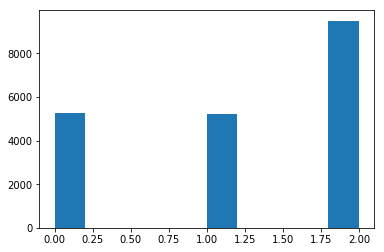

In [9]:
pyplot.hist(dataset['BUILDINGID'])
pyplot.show()



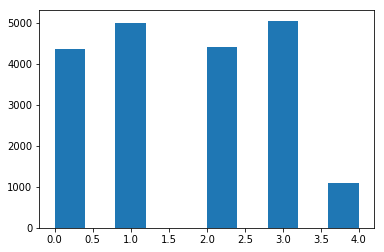

In [10]:
pyplot.hist(dataset['FLOOR'])
pyplot.show()

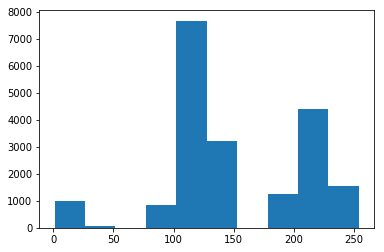

In [11]:
pyplot.hist(dataset['SPACEID'])
pyplot.show()

In [12]:
#features
features = dataset.iloc[:,0:520]
print('Summary of feature sample')
features.head()

Summary of feature sample


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [13]:
#dependent variable
depVar = dataset['SPACEID']
depVar.head()

0    106
1    106
2    103
3    102
4    122
Name: SPACEID, dtype: int64

In [14]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
2,100,100,100,100,100,100,100,-97,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [15]:
#Dependent Variable Training Set (Y Training)
Y_train = depVar[: 1000]
Y_train_count = len(Y_train.index)
print('The number of observations in the Y training set are:',str(Y_train_count))
Y_train.head()

The number of observations in the Y training set are: 1000


0    106
1    106
2    103
3    102
4    122
Name: SPACEID, dtype: int64

In [16]:
#Testing Set (X Testing)
X_test = features[-300:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 300
       WAP001  WAP002  WAP003  WAP004  WAP005  WAP006  WAP007  WAP008  WAP009  WAP010   ...    \
19637     100     100     100     100     100     100     100     100     100     100   ...     
19638     100     100     100     100     100     100     100     100     100     100   ...     
19639     100     100     100     100     100     100     100     100     100     100   ...     
19640     100     100     100     100     100     100     100     100     100     100   ...     
19641     100     100     100     100     100     100     100     100     100     100   ...     

       WAP511  WAP512  WAP513  WAP514  WAP515  WAP516  WAP517  WAP518  WAP519  WAP520  
19637     100     100     100     100     100     100     100     100     100     100  
19638     100     100     100     100     100     100     100     100     100     100  
19639     100     100     100     100     100     100     100     100     100     100  
196

In [17]:
#Ground Truth (y_test) 
Y_test = depVar[-300:]
Y_test_count = len(Y_test.index)
print('The number of observations in the Y training set are:',str(Y_test_count))
Y_test.head()

The number of observations in the Y training set are: 300


19637    116
19638    102
19639    102
19640    104
19641    104
Name: SPACEID, dtype: int64

In [18]:
# Split-out validation dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train)
X_train.shape, X_test.shape

((750, 520), (250, 520))

# Use 10-fold cross validation to estimate accuracy.

In [19]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'

# Build Models. Evaluate six algorithms including simple linear(LR and LDA) and 4 nonlinear.

In [20]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression())) 
models.append(('LDA', LinearDiscriminantAnalysis())) 
models.append(('KNN', KNeighborsClassifier())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('SVM', SVC()))

# Train suite of algorithms and select best models. 

In [21]:
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: 0.605333 (0.048148)
LDA: 0.592000 (0.070098)
KNN: 0.564000 (0.036295)
CART: 0.604000 (0.048826)
NB: 0.634667 (0.045490)
SVM: 0.062667 (0.027358)


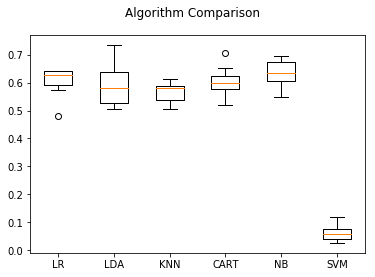

In [22]:
# Compare Algorithms
fig = pyplot.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

# Stardardize dataset and rerun algorithms to evaluate improvement.

In [23]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())]))) 
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

ScaledLR: 0.634667 (0.043081)
ScaledLDA: 0.485333 (0.241933)
ScaledKNN: 0.513333 (0.050684)
ScaledCART: 0.602667 (0.054910)
ScaledNB: 0.613333 (0.040000)
ScaledSVM: 0.381333 (0.045879)


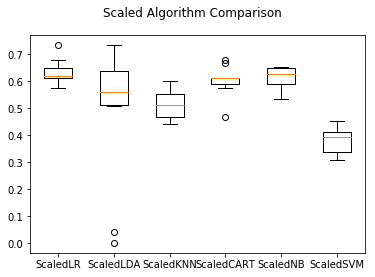

In [24]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

Tune a couple of algorithms to see if results improve.

In [25]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,15,21,25]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score'] 
stds = grid_result.cv_results_['std_test_score'] 
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.640000 using {'n_neighbors': 1}
0.640000 (0.042583) with: {'n_neighbors': 1}
0.329333 (0.047347) with: {'n_neighbors': 15}
0.282667 (0.035678) with: {'n_neighbors': 21}
0.252000 (0.051450) with: {'n_neighbors': 25}


In [26]:
# Tune scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.5, 1.0, 1.5]
kernel_values = ['linear', 'poly','rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) 
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.644000 using {'C': 0.1, 'kernel': 'linear'}
0.644000 (0.038204) with: {'C': 0.1, 'kernel': 'linear'}
0.049333 (0.023132) with: {'C': 0.1, 'kernel': 'poly'}
0.034667 (0.016000) with: {'C': 0.1, 'kernel': 'rbf'}
0.038667 (0.016275) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.638667 (0.040200) with: {'C': 0.5, 'kernel': 'linear'}
0.069333 (0.017689) with: {'C': 0.5, 'kernel': 'poly'}
0.248000 (0.034358) with: {'C': 0.5, 'kernel': 'rbf'}
0.173333 (0.027968) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.638667 (0.041505) with: {'C': 1.0, 'kernel': 'linear'}
0.097333 (0.020699) with: {'C': 1.0, 'kernel': 'poly'}
0.368000 (0.047777) with: {'C': 1.0, 'kernel': 'rbf'}
0.285333 (0.031098) with: {'C': 1.0, 'kernel': 'sigmoid'}
0.637333 (0.039010) with: {'C': 1.5, 'kernel': 'linear'}
0.118667 (0.026297) with: {'C': 1.5, 'kernel': 'poly'}
0.446667 (0.052747) with: {'C': 1.5, 'kernel': 'rbf'}
0.341333 (0.050315) with: {'C': 1.5, 'kernel': 'sigmoid'}


# Train ensembles and compare

In [27]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier())) 
ensembles.append(('GBM', GradientBoostingClassifier())) 
ensembles.append(('RF', RandomForestClassifier())) 
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.096000 (0.058667)
GBM: 0.570667 (0.044939)
RF: 0.752000 (0.043492)


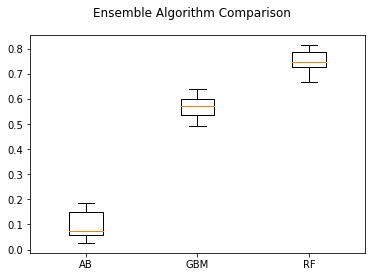

In [28]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Ensemble Algorithm Comparison') 
ax = fig.add_subplot(111) 
pyplot.boxplot(results) 
ax.set_xticklabels(names)
pyplot.show()

# Make Predictions

In [39]:
#Make Predictions with NaiveBayes
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_test)
predAccuracy = accuracy_score(Y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy: 0.700
[[4 0 0 ... 0 0 0]
 [1 3 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           2       0.67      0.80      0.73         5
           3       1.00      0.60      0.75         5
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       0.67      1.00      0.80         2
           8       0.50      1.00      0.67         1
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         8
          16       0.57      0.80      0.67         5
          17       0.75      1.00      0.86         3
          18       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         3
          26       1.00      1.00      1.00         1

In [38]:
#Make Predictions with LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_test)
predAccuracy = accuracy_score(Y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy: 0.652
[[2 0 0 ... 0 0 0]
 [1 2 2 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 1 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           2       0.67      0.40      0.50         5
           3       1.00      0.40      0.57         5
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.50      1.00      0.67         1
           9       0.50      0.67      0.57         3
          10       1.00      1.00      1.00         1
          15       1.00      0.88      0.93         8
          16       0.50      0.20      0.29         5
          17       0.67      0.67      0.67         3
          18       0.80      0.80      0.80         5
          22       0.43      1.00      0.60         3
          26       0.50      1.00      0.67         1

In [37]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict(X_test)
predAccuracy = accuracy_score(Y_test,predictions)
print('Accuracy: %.3f' % predAccuracy)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Accuracy: 0.708
[[4 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           2       0.80      0.80      0.80         5
           3       0.00      0.00      0.00         5
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.20      1.00      0.33         1
           9       1.00      0.67      0.80         3
          10       0.50      1.00      0.67         1
          15       1.00      0.75      0.86         8
          16       0.80      0.80      0.80         5
          17       1.00      0.67      0.80         3
          18       0.80      0.80      0.80         5
          22       1.00      1.00      1.00         3
          26       1.00      1.00      1.00         1

In [40]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_test)
predKappa = cohen_kappa_score(Y_test,predictions)
print('Kappa: %.3f' % predKappa)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Kappa: 0.647
[[2 0 0 ... 0 0 0]
 [1 2 2 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 1 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           2       0.67      0.40      0.50         5
           3       1.00      0.40      0.57         5
           4       0.50      1.00      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.50      1.00      0.67         1
           9       0.50      0.67      0.57         3
          10       1.00      1.00      1.00         1
          15       1.00      0.88      0.93         8
          16       0.50      0.20      0.29         5
          17       0.67      0.67      0.67         3
          18       0.80      0.80      0.80         5
          22       0.43      1.00      0.60         3
          26       0.50      1.00      0.67         1
  

In [44]:
NB = GaussianNB()
NB.fit(X_train, Y_train)
predictions = NB.predict(X_test)
predKappa = cohen_kappa_score(Y_test,predictions)
print('Kappa: %.3f' % predKappa)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Kappa: 0.695
[[4 0 0 ... 0 0 0]
 [1 3 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 6 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           2       0.67      0.80      0.73         5
           3       1.00      0.60      0.75         5
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       0.00      0.00      0.00         1
           7       0.67      1.00      0.80         2
           8       0.50      1.00      0.67         1
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         1
          15       1.00      0.50      0.67         8
          16       0.57      0.80      0.67         5
          17       0.75      1.00      0.86         3
          18       0.83      1.00      0.91         5
          22       1.00      1.00      1.00         3
          26       1.00      1.00      1.00         1
  

In [42]:
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)
predictions = RF.predict(X_test)
predKappa = cohen_kappa_score(Y_test,predictions)
print('Kappa: %.3f' % predKappa)
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

Kappa: 0.764
[[5 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       0.50      1.00      0.67         1
           9       1.00      0.67      0.80         3
          10       0.50      1.00      0.67         1
          15       1.00      0.75      0.86         8
          16       1.00      0.80      0.89         5
          17       0.75      1.00      0.86         3
          18       1.00      0.80      0.89         5
          22       1.00      1.00      1.00         3
          26       1.00      1.00      1.00         1
  